# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [11]:
import tensorflow as tf
import pickle
#import helper
import random
import numpy as np
import cv2

In [12]:
# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [13]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
#print(train)
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.array(X_train[1]).shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [14]:
# List of labels
import csv
idSignname = {}
signNames = []

with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        idSignname[int(row['ClassId'])] = row['SignName']
        signNames.append(row['SignName'])
        
for i in range(5):
    print(str(i)+": "+idSignname[i])
print("...")

0: Speed limit (20km/h)
1: Speed limit (30km/h)
2: Speed limit (50km/h)
3: Speed limit (60km/h)
4: Speed limit (70km/h)
...


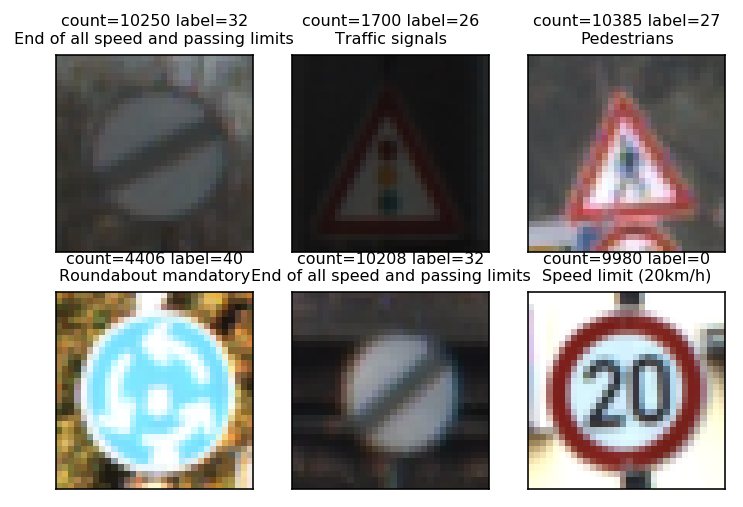

In [15]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Visualizations will be shown in the notebook.
%matplotlib inline

# plotting 6 random traffic signs with #nr and #label
for i in range(1, 7):
    nr = random.randrange(0, n_test-1, 1)
    subplot = plt.subplot(2, 3, i) # equivalent to: plt.subplot(2, 2, 1)
    subplot.set_xticks(())
    subplot.set_yticks(())
    
    plt.imshow(X_train[nr])
    plt.title('count='+str(nr) + ' label='+str(y_train[nr])+'\n'+idSignname[y_train[nr]], fontsize=8)


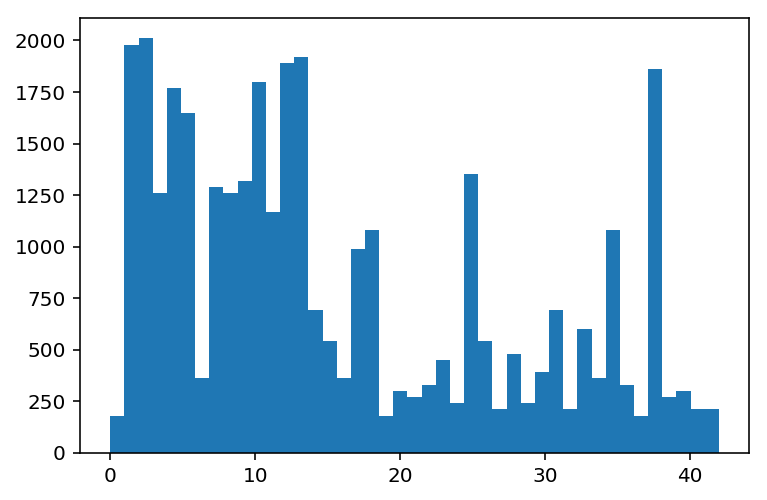

In [16]:
# there is an inbalance of the occurance of different signs types
# histogram of data
n, bins, patches = plt.hist(y_train, n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Data Augmentation in order to increase training data and to balance the occurance of different sign types

rotate, translate, zoom in, zoom out, stretch, random noise

In [17]:
TARGET_COUNT_PER_SIGN_TYPE = 5000

In [18]:
'''
    x: list of images
    y: list of label
    returns list|dict of sign names
'''

def createDictIndex(x, y):
    dictIndex = {}
    
    setIndex = set(y)
    
    for index in setIndex:
        dictIndex[index] = []
    
    for i in range(len(y)):
        dictIndex[y[i]].append(i)
    
    return dictIndex

In [19]:
# Data Augmentation
def rotate_scale(x, y, angle, scale):
    
    '''
    x: list of images
    y: list of label
    angle: rotation angle
    scale: scale factor
    returns x, y with added new (augmented) data
    '''
    
    print("scale:", scale)
    augmented_x = []
    augmented_y = []
    
    center = (len(x[0])/2, len(x[0][0])/2 );
    M = cv2.getRotationMatrix2D( center, angle, scale );
    
    dictIndex = createDictIndex(x, y)
    
    for indexSignType in dictIndex.keys():
        
        count = len(dictIndex[indexSignType])
#        if count > TARGET_COUNT_PER_SIGN_TYPE:
#            print("sign type", indexSignType, ": already more than", TARGET_COUNT_PER_SIGN_TYPE, " images (", count, ")")
        if count < TARGET_COUNT_PER_SIGN_TYPE:
#            print("sign type", indexSignType, ": count", count, "generating rotated images")
            for indexImage in dictIndex[indexSignType]:
                img = x[indexImage]
                rows, cols, depth = img.shape
                
                rot_dst = np.zeros( img.shape)
                
                dst = cv2.warpAffine( img, M, (cols, rows) );
                
                augmented_x.append(dst)
                augmented_y.append(indexSignType)
    
    if (len(x.shape) == len(np.array(augmented_x).shape) and len(y.shape) == len(np.array(augmented_y).shape)):
        x = np.vstack([x, np.array(augmented_x)])
        y = np.concatenate((y, np.array(augmented_y)), axis=0)
    else:
        print("no images added")
        
    return(x, y)

In [20]:
# Data Augmentation
def translate(x, y, trans_h, trans_v):
    import cv2
    '''
    x: list of images
    y: list of label
    trans_h: translation horizontal
    trans_v: translation vertical
    returns x, y with added new (augmented) data
    '''
    
    augmented_x = []
    augmented_y = []
    
    center = (len(x[0])/2, len(x[0][0])/2 );
    M = np.float32([[1,0,trans_h],[0,1,trans_v]])
    
    dictIndex = createDictIndex(x, y)
    
    for indexSignType in dictIndex.keys():
        
        count = len(dictIndex[indexSignType])
#        if count > TARGET_COUNT_PER_SIGN_TYPE:
#            print("sign type", indexSignType, ": already more than", TARGET_COUNT_PER_SIGN_TYPE, " images (", count, ")")
        if count < TARGET_COUNT_PER_SIGN_TYPE:
#            print("sign type", indexSignType, ": count", count, "generating rotated images")
            for indexImage in dictIndex[indexSignType]:
                img = x[indexImage]
                rows, cols, depth = img.shape
                
                rot_dst = np.zeros( img.shape)
                
                dst = cv2.warpAffine( img, M, (cols, rows) );
                
                augmented_x.append(dst)
                augmented_y.append(indexSignType)
                
    if (len(x.shape) == len(np.array(augmented_x).shape) and len(y.shape) == len(np.array(augmented_y).shape)):
        x = np.vstack([x, np.array(augmented_x)])
        y = np.concatenate((y, np.array(augmented_y)), axis=0)
    else:
        print("no images added")

    return(x, y)

In [21]:

def augment(x, y):
    print("count images: ", len(x))
    print(x.shape)

    # Rotation
    for angle in (-1, 1, -2, 2):
        x, y = rotate_scale(x, y, angle, 1.05)
        print("count images: ", len(x))
   
    # Zoom in
    for scale in (1.05, 1.10):
        x, y = rotate_scale(x, y, 0., scale)
        print("count images: ", len(x))

    # Translate
    for transl in ([1., 0.], [-1., 0.], [0., 1.], [0., -1.]):
        x, y = translate(x, y, transl[0], transl[1])
        print("count images: ", len(x))

    return(x, y)
        
if (True):
    X_train, y_train = augment(X_train, y_train)


count images:  34799
(34799, 32, 32, 3)
scale: 1.05
count images:  69598
scale: 1.05
count images:  139196
scale: 1.05
count images:  192952
scale: 1.05
count images:  254864
scale: 1.05
count images:  302864
scale: 1.1
no images added
count images:  302864
no images added
count images:  302864
no images added
count images:  302864
no images added
count images:  302864
no images added
count images:  302864


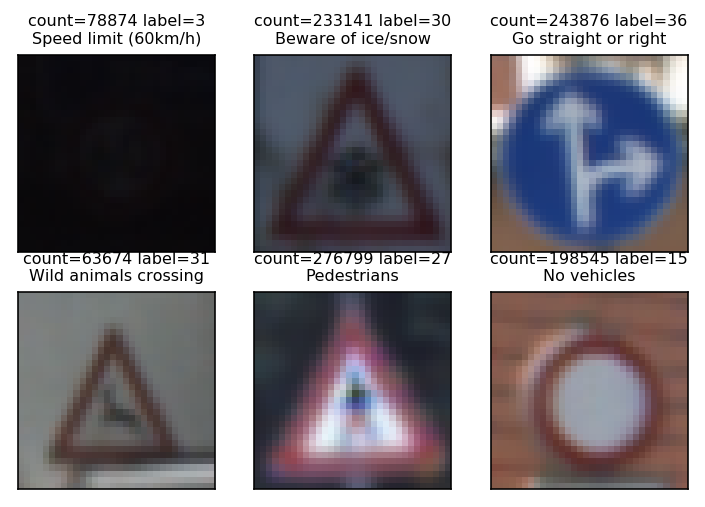

In [22]:
### Data exploration after data augmentation.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# plotting 6 random traffic signs with #nr and #label
for i in range(1, 7):
    nr = random.randrange(0, len(X_train)-1, 1)
    subplot = plt.subplot(2, 3, i) # equivalent to: plt.subplot(2, 2, 1)
    subplot.set_xticks(())
    subplot.set_yticks(())
    
    plt.imshow(X_train[nr])
    plt.title('count='+str(nr) + ' label='+str(y_train[nr])+'\n'+idSignname[y_train[nr]], fontsize=8)


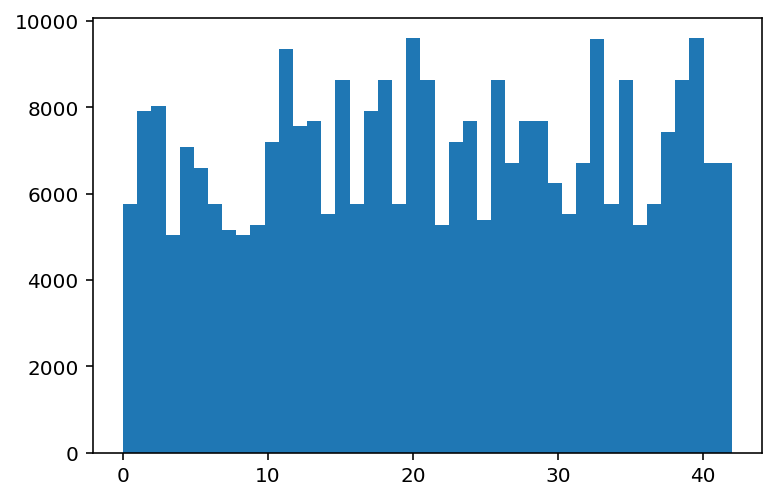

In [23]:
# there is an inbalance of the occurance of different signs types
# histogram of data
n, bins, patches = plt.hist(y_train, n_classes)

In [24]:
def rgb2gray(x):
    return np.dot(x[...,:3], [0.299, 0.583, 0.114])

In [25]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    
    x_norm = []

    for img in x:
        x_norm.append(img/255)
    
    return x_norm

In [26]:
import cv2
def grayscale(x):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    x_gray = []
    for img in x:
        img2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        x_gray.append(img2)
        
    return np.array(x_gray)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    #return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [27]:
def reshape(x):
    
    img2 = []
    for img in x:
        img_reshaped = img.reshape((32, 32, 1))
        img2.append(img_reshaped)
    return np.array(img2)

In [28]:
def one_hot_encode(x, n_classes):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : n_classes: Number of classes
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    all = []
    
    for label in x:
#        print(label)
        
        # create vector with zeros
        lbl_vec = np.zeros(n_classes)
        
        # set the appropriate value to 1.
        lbl_vec[label] = 1.
        
#        print(lbl_vec)
        
        all.append(lbl_vec)
    
#    print(all)
    return np.array(all)

In [29]:
# Preprocessing
def preprocess(x, y):
    # convert to greyscale
    x = rgb2gray(x)

    x = normalize(x)
    
    x = reshape(x)

    # Transform all labels in one_hot representation
    y = one_hot_encode(y, n_classes)
    
    return(x.astype(np.float32), y.astype(np.float32))

In [30]:
# Perform Preprocess

from sklearn.utils import shuffle

print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

X_train, y_train = preprocess(X_train, y_train)
X_valid, y_valid = preprocess(X_valid, y_valid)
X_test, y_test = preprocess(X_test, y_test)

# shuffle training data
X_train, y_train = shuffle(X_train, y_train)

# outp
print("X_train", X_train.shape, X_train.dtype)
print("X_test", X_test.shape, X_test.dtype)

print("y_train", y_train.shape, y_train.dtype)
print("y_test", y_test.shape, y_test.dtype)

(302864, 32, 32, 3) uint8
(12630, 32, 32, 3) uint8
X_train (302864, 32, 32, 1) float32
X_test (12630, 32, 32, 1) float32
y_train (302864, 43) float32
y_test (12630, 43) float32


In [31]:
# check the normalization
maxv = -10
minv = 10
avrg = 0

nr = random.randrange(0, len(X_train)-1, 1)
img = X_train[nr]

if np.amin(img) < minv:
    minv = np.amin(img)
if np.amax(img) > maxv:
    maxv = np.amax(img)
    
avrg = np.mean(img)
    
print('min value in random example image =', minv)
print('max value in random example image =', maxv)
print('mean of all values in a random example image =', avrg)


min value in random example image = 0.161145
max value in random example image = 0.447447
mean of all values in a random example image = 0.280698


### Model Architecture

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.


In [32]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128
dropout = 0.7

In [33]:
def myflatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    shape = x_tensor.get_shape().as_list()
    x_reshaped = tf.reshape(x_tensor, [-1, shape[1] * shape[2] * shape[3]])
    
#    print(x_reshaped.get_shape().as_list())
    
    return x_reshaped

In [34]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 32), mean = mu, stddev = sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1, name='conv1')

    # Pooling. Input = 32x32x32. Output = 16x16x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Input = 16x16x32 Output = 16x16x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2, name='conv2')

    # dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # Pooling. Input = 16x16x64. Output = 8x8x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 3: Convolutional. Input = 8x8x64 Output = 8x8x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma), name='conv3_W')
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3, name='conv3')

    # dropout
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    # Pooling. Input = 8x8x128. Output = 4x4x128.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Flatten. Input = 4x4x128. Output = 4096 (?).
    fc0   = flatten(conv2)
    
    # Layer 4: Fully Connected. Input = 4096. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(4096, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 5: Fully Connected. Input = 1024. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 6: Fully Connected. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return(logits)

## Features and Labels
Train LeNet to classify [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [35]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 1], name='x')
y = tf.placeholder(dtype=tf.int32, shape=[None, n_classes], name='y')
keep_prob = tf.placeholder(dtype=tf.float32, name='keep_prob')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [36]:
rate = 0.0001

# get the logits and the convolutional layers for later visualization
logits = LeNet(x, keep_prob)
# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [37]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train Model

In [28]:
import time
import datetime

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    num_examples = len(X_train)
    
    st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')
    
    print(st + ": Training...")
    print()

    for i in range(EPOCHS):
        #X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
            
        validation_accuracy = evaluate(X_valid, y_valid)
            #print("Epoch {} Batch {} Validation Accuracy {:.3f}...".format(i+1, int(offset/BATCH_SIZE+1), validation_accuracy))
        
        st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')
        print(st + ": Epoch {} Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
 #       print()
    
        saver.save(sess, './checkpoints/lenet')
        print("Model saved")

2017-03-21 22:03:26: Training...

2017-03-21 22:11:28: Epoch 1 Validation Accuracy = 0.818
Model saved
2017-03-21 22:19:29: Epoch 2 Validation Accuracy = 0.867
Model saved
2017-03-21 22:27:18: Epoch 3 Validation Accuracy = 0.874
Model saved
2017-03-21 22:35:06: Epoch 4 Validation Accuracy = 0.897
Model saved
2017-03-21 22:42:53: Epoch 5 Validation Accuracy = 0.899
Model saved
2017-03-21 22:50:38: Epoch 6 Validation Accuracy = 0.907
Model saved
2017-03-21 22:58:23: Epoch 7 Validation Accuracy = 0.916
Model saved
2017-03-21 23:06:06: Epoch 8 Validation Accuracy = 0.922
Model saved
2017-03-21 23:13:47: Epoch 9 Validation Accuracy = 0.922
Model saved
2017-03-21 23:21:27: Epoch 10 Validation Accuracy = 0.915
Model saved
2017-03-21 23:29:09: Epoch 11 Validation Accuracy = 0.927
Model saved
2017-03-21 23:36:49: Epoch 12 Validation Accuracy = 0.917
Model saved
2017-03-21 23:44:28: Epoch 13 Validation Accuracy = 0.927
Model saved
2017-03-21 23:52:06: Epoch 14 Validation Accuracy = 0.921
Model s

# Test the model against the test data
Output the test accuracy and sample results

Testing Accuracy: 0.9418689738018344

softmax predictions:  [  9.24356945e-12   1.58966607e-11   1.00000000e+00]
softmax predictions:  [  2.30510501e-04   1.70112699e-01   8.29636097e-01]
softmax predictions:  [  9.32927069e-09   6.18543436e-06   9.99993801e-01]
softmax predictions:  [  2.27236092e-06   3.65560004e-06   9.99993920e-01]


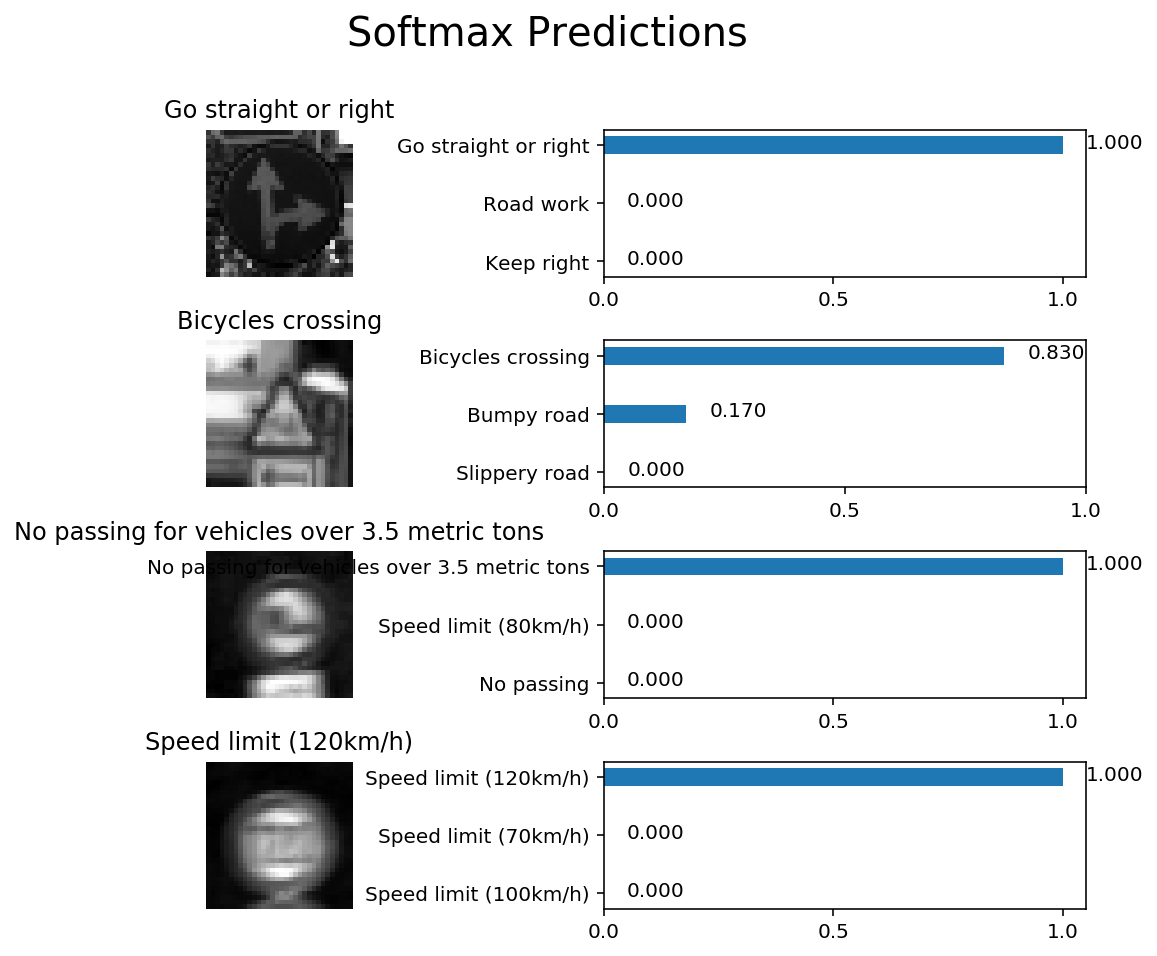

In [38]:
import numpy as np
import tensorflow as tf
import pickle
from sklearn.preprocessing import LabelBinarizer

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './checkpoints/lenet'

def display_image_predictions(features, labels, predictions, n_samples, n_predictions):
    n_classes = 43
    label_names = signNames
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(figsize=(8, n_samples*1.5), nrows=n_samples, ncols=2)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]
        
        # print the softmax values
        print("softmax predictions: ", pred_values[::-1])
        
        # reshape the image to be plottable by matplotlib
        feature_reshaped = feature.reshape((32, 32))
        
        axies[image_i][0].imshow(feature_reshaped, cmap="gray")
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])
        
        # text annotations
        counter = 0
        for pred_value in sorted(pred_values[::-1]):
            pred_value_string = "{:05.3f}".format(pred_value)
            axies[image_i][1].text(pred_value + margin , counter, pred_value_string)
            counter += 1
        


def batch_features_labels(x, y, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(x), batch_size):
        end = min(start + batch_size, len(x))
        yield x[start:end], y[start:end]

def test_model(x, y, n_samples=4, top_n_predictions=3):
    """
    Test the saved model against the test dataset
    """

    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in batch_features_labels(x, y, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(x, y)), n_samples)))
        
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions, n_samples, top_n_predictions)


test_model(X_test, y_test)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

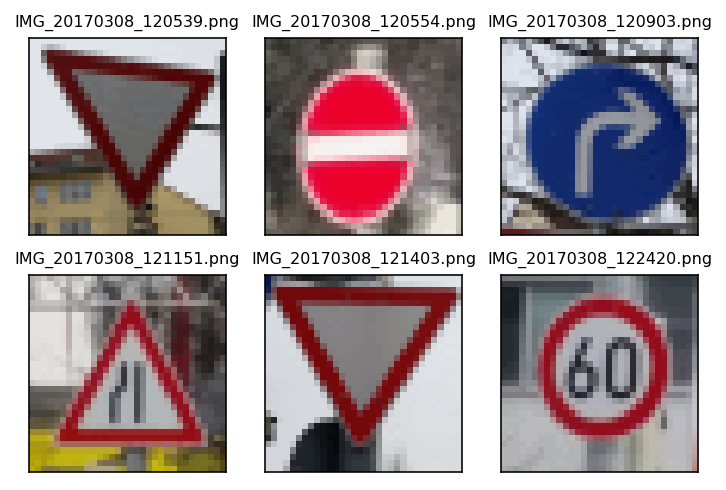

In [39]:
import os
### Load the images and plot them here.
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load color images into a numpy array
X_classify = []
#y_classify = []

counter = 1
for file in os.listdir("./traffic-signs-for-classification"):
    if file.endswith(".png"):
        pathfile = os.path.join("./traffic-signs-for-classification", file)
        
        img = cv2.imread(pathfile)
        X_classify.append(img)

        subplot = plt.subplot(2, 3, counter) # equivalent to: plt.subplot(2, 2, 1)
        subplot.set_xticks(())
        subplot.set_yticks(())
    
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(file, fontsize=8)
        
        counter += 1

        
X_classify = np.array(X_classify)

#img = cv2.imread('messi5.jpg',0)
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [40]:
# Preprocess images
# these are the correct labels, that will be compared to the predictions
y_classify = [13, 17, 33, 24, 13, 3]
X_classify, y_classify = preprocess(X_classify, y_classify)
#print(X_classify[0])

### Analyze Performance

In [32]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

Testing Accuracy: 1.0

softmax predictions:  [  6.83392467e-35   6.28699791e-34   1.12626075e-32   1.58849149e-28
   1.00000000e+00]
softmax predictions:  [ 0.  0.  0.  0.  1.]
softmax predictions:  [  4.13292444e-19   7.30437704e-19   4.27053564e-17   8.36154435e-09
   1.00000000e+00]
softmax predictions:  [ 0.  0.  0.  0.  1.]
softmax predictions:  [  1.22637252e-13   7.05641166e-13   6.20672722e-08   2.84816797e-05
   9.99971390e-01]
softmax predictions:  [  9.85496641e-22   2.86833238e-21   1.41033235e-13   1.79725904e-13
   1.00000000e+00]


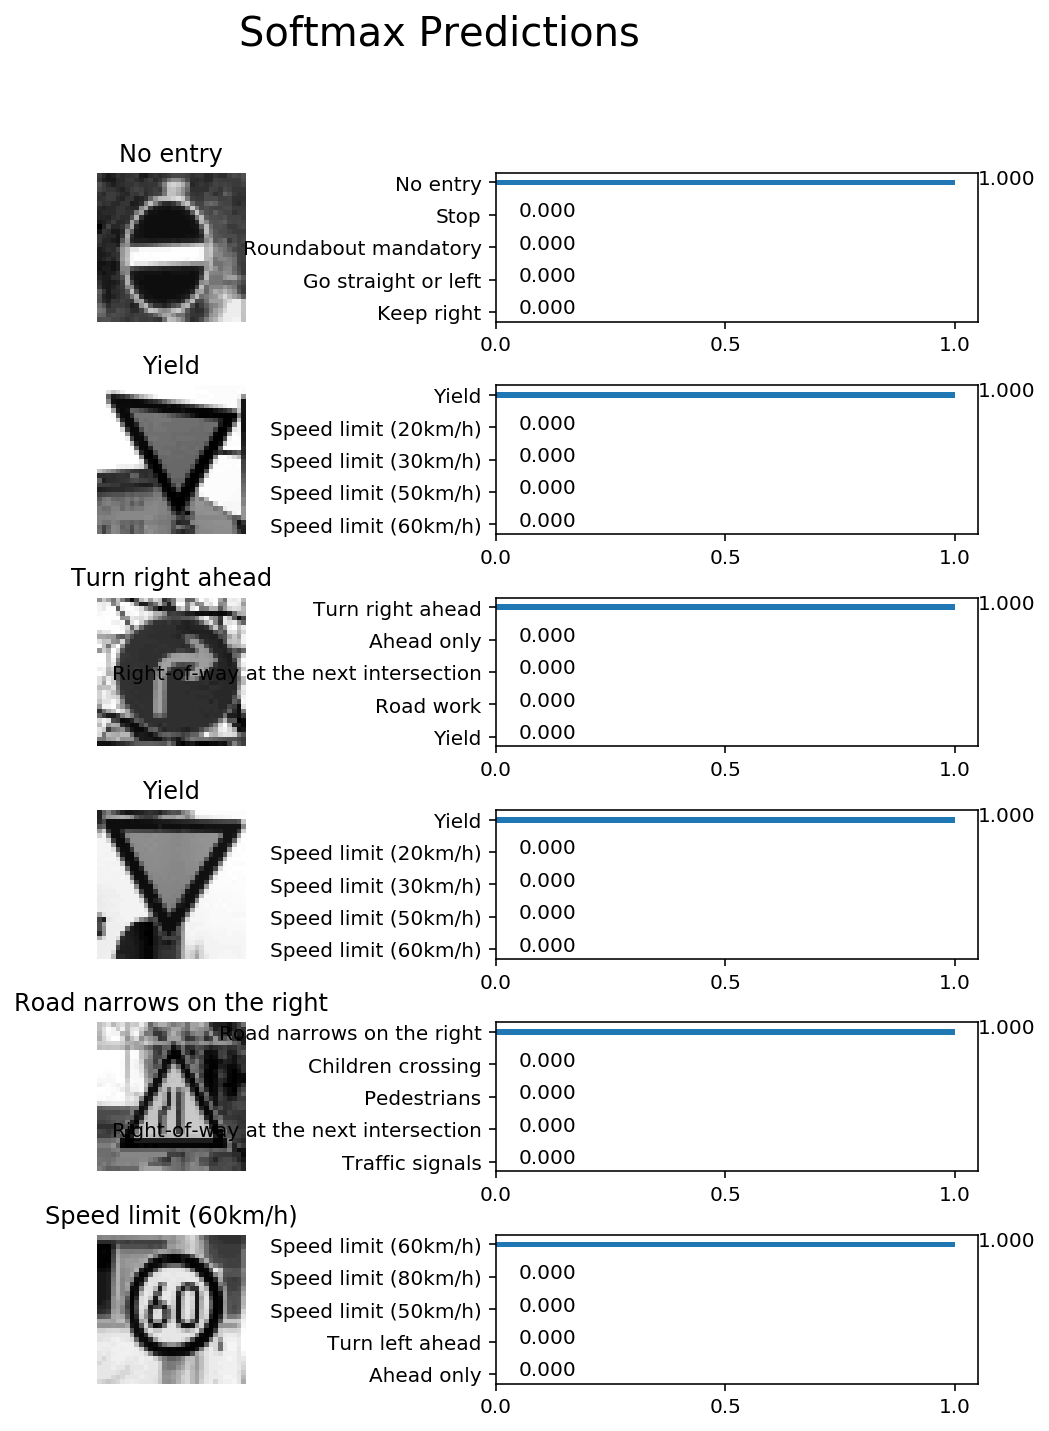

In [41]:
# calc the accuracy and the predictions
test_model(X_classify, y_classify, len(y_classify), 5)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [42]:
def getActivations(sess, layer, stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,1024],order='F'),keep_prob:1.0})
    plotNNFilter(units)

In [43]:
import math
def plotNNFilter(units, act_min, act_max):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", vmin=act_min, vmax=act_max, cmap="gray")

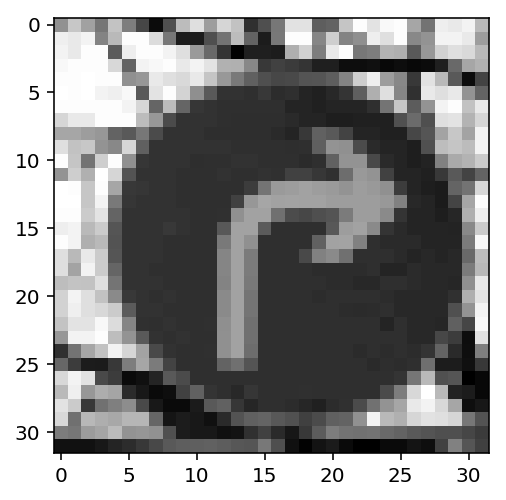

In [59]:
plt.imshow(np.reshape(X_classify[2],[32,32]), interpolation="nearest", cmap="gray")
imageToUse = []
imageToUse.append(X_classify[2])
imageToUse = np.array(imageToUse)

In [51]:
'''
image: image to use for activating the network
convNr: number of convolutional layer to visualize
type=weight|activation: visualizing the weights or the activations of the conv layer
'''

def visualize_conv(image, convNr, type='activation', vmin=None, vmax=None):
    save_model_path = './checkpoints/lenet'
    loaded_graph = tf.Graph()

    
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')

        loaded_conv = {}
        
        loaded_conv[1] = loaded_graph.get_tensor_by_name('conv1:0')
        loaded_conv[2] = loaded_graph.get_tensor_by_name('conv2:0')
        loaded_conv[3] = loaded_graph.get_tensor_by_name('conv3:0')

        loaded_conv_W = {}
        
        loaded_conv_W[1] = loaded_graph.get_tensor_by_name('conv1_W:0')
        loaded_conv_W[2] = loaded_graph.get_tensor_by_name('conv2_W:0')
        loaded_conv_W[3] = loaded_graph.get_tensor_by_name('conv3_W:0')
        
        if(type == 'activation'):
            units = sess.run(loaded_conv[convNr],feed_dict={loaded_x: image, loaded_keep_prob: 1.0})
        elif(type == 'weight'):
            units = sess.run(loaded_conv_W[convNr],feed_dict={loaded_x: image, loaded_keep_prob: 1.0})
        else:
            print("unknown type "+type)
        
        
        if vmin == None:
            vmin = np.amin(units)
        if vmax == None:
            vmax = np.amax(units)

        
        
        #print(np.amin(units))
        
#        units = sess.run(layer,feed_dict={loaded_x:np.reshape(X_classify[1],[1,1024],order='F'),keep_prob:1.0})
        plotNNFilter(units, vmin, vmax)

# Visualize Activations of Convolutional Layer 1

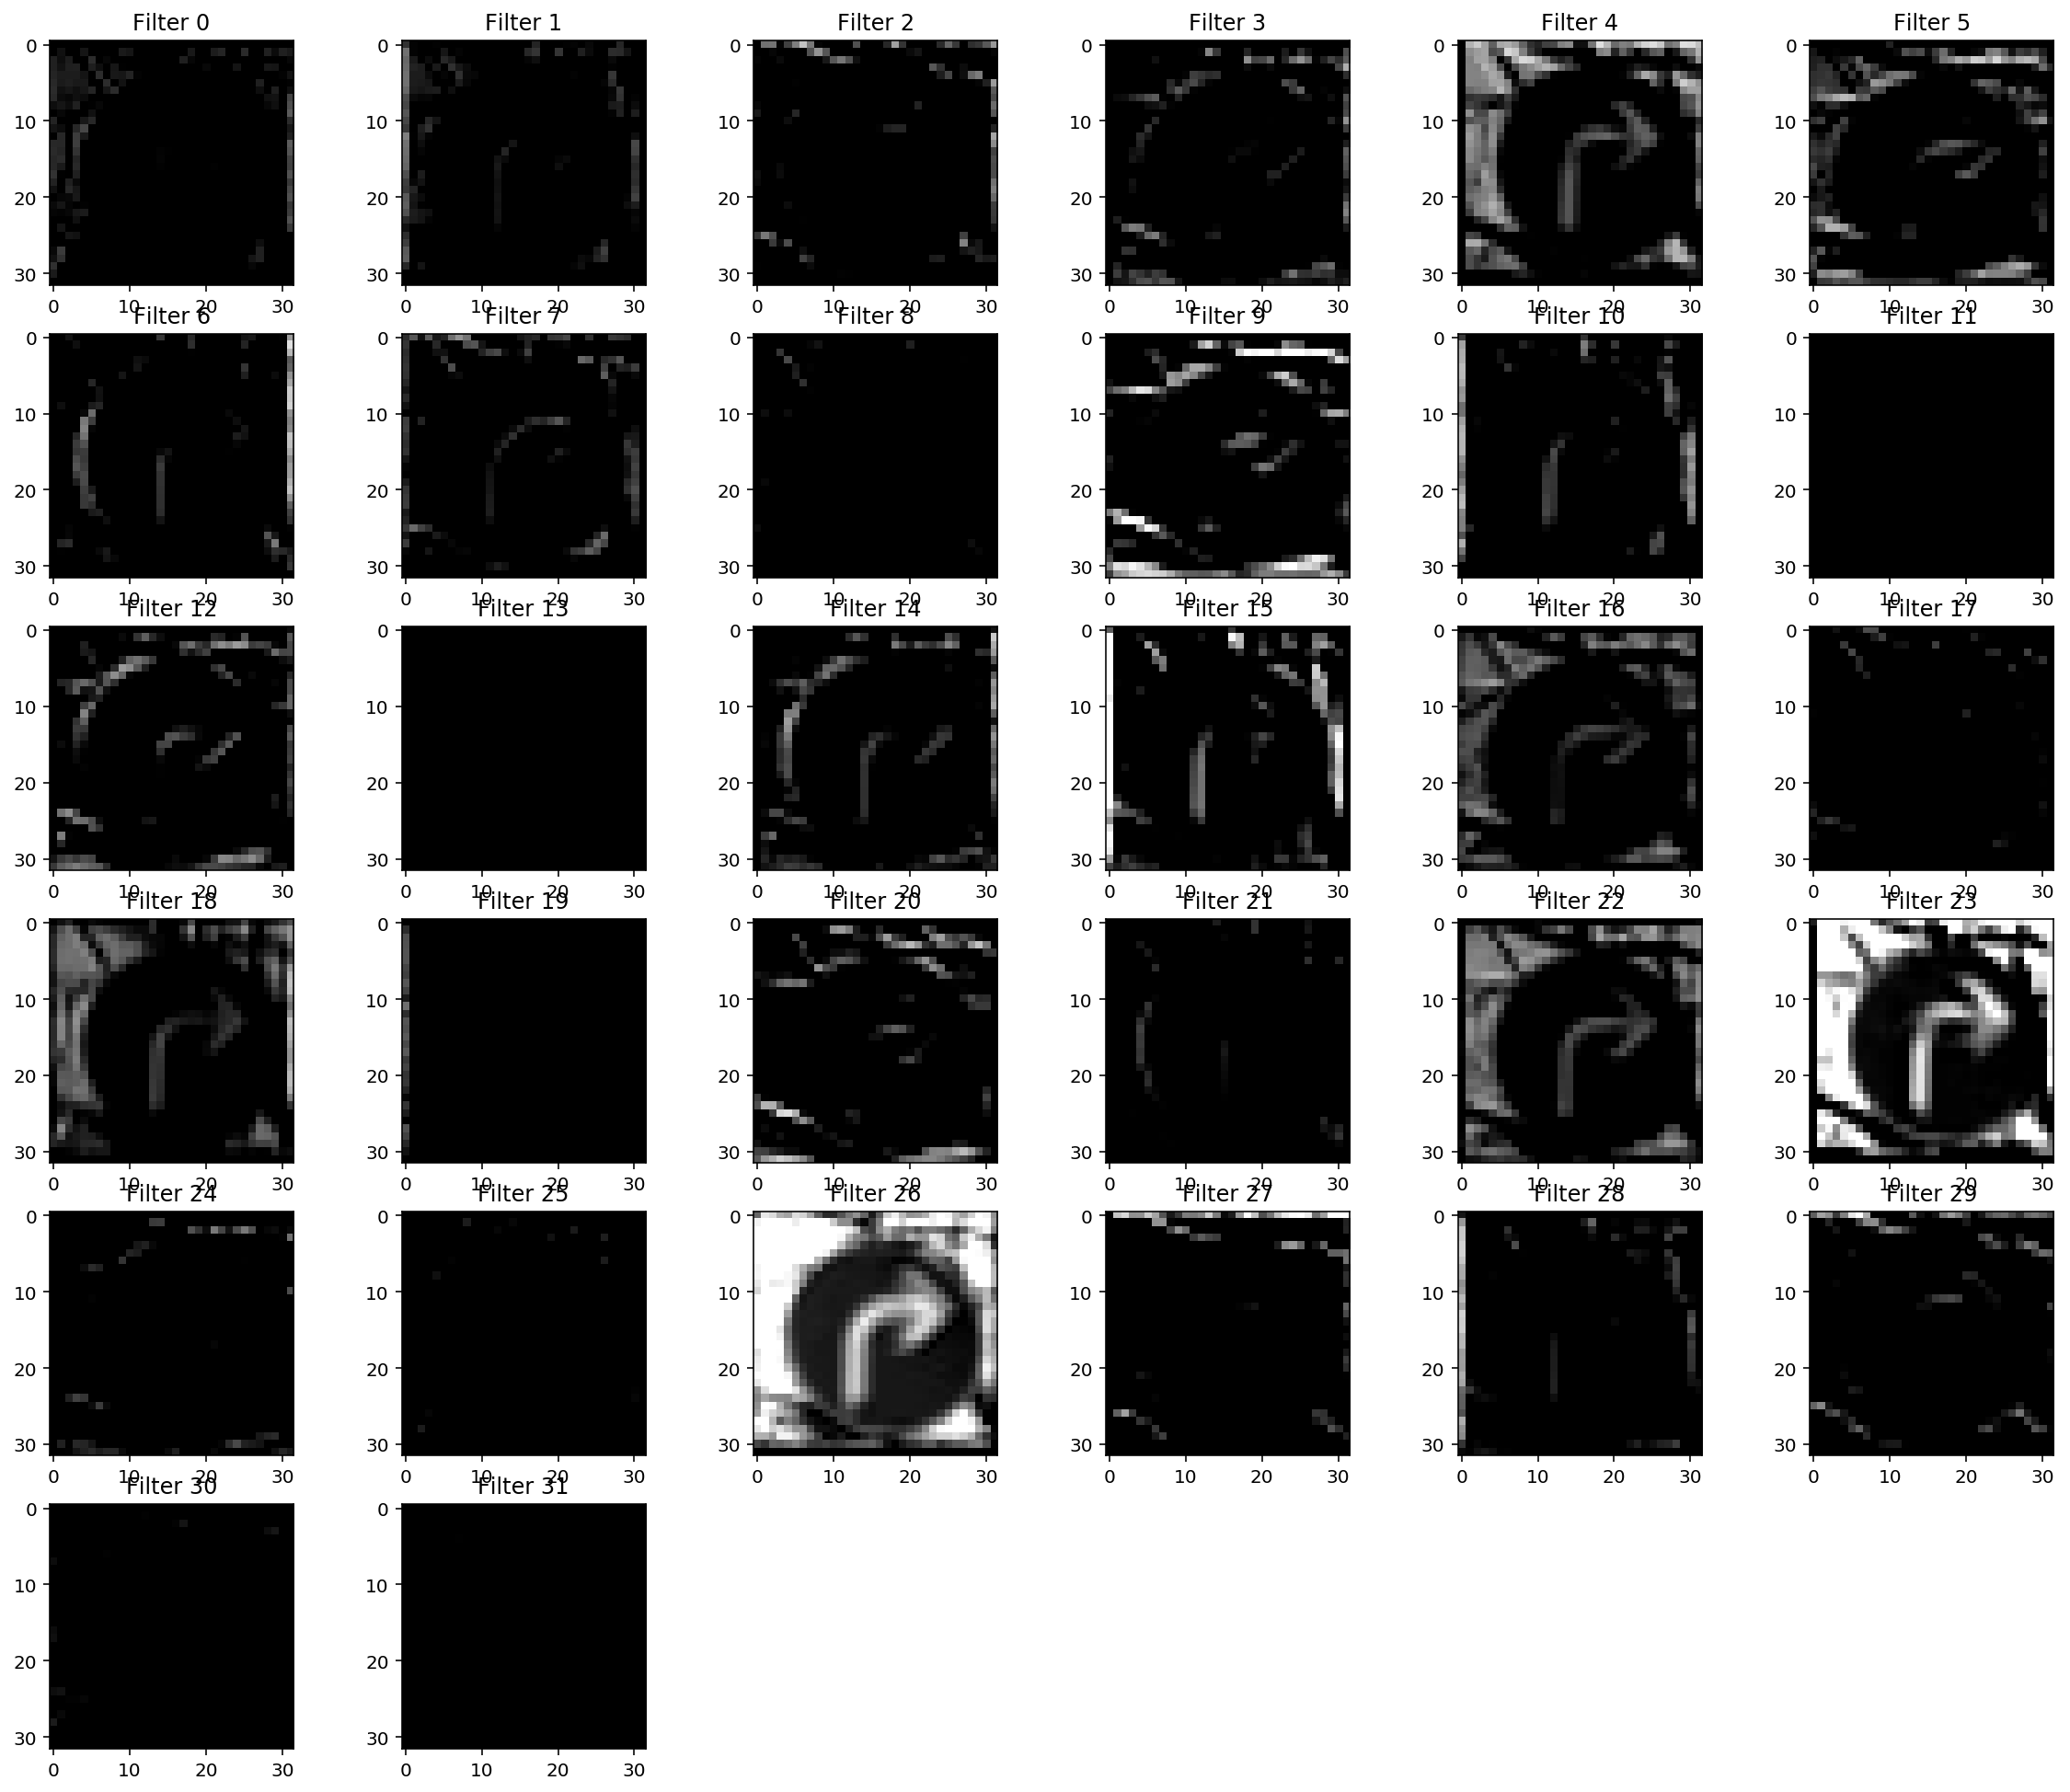

In [61]:
visualize_conv(imageToUse, 1, 'activation', 0.1, 0.4)

# Visualize Activations of Convolutional Layer 2

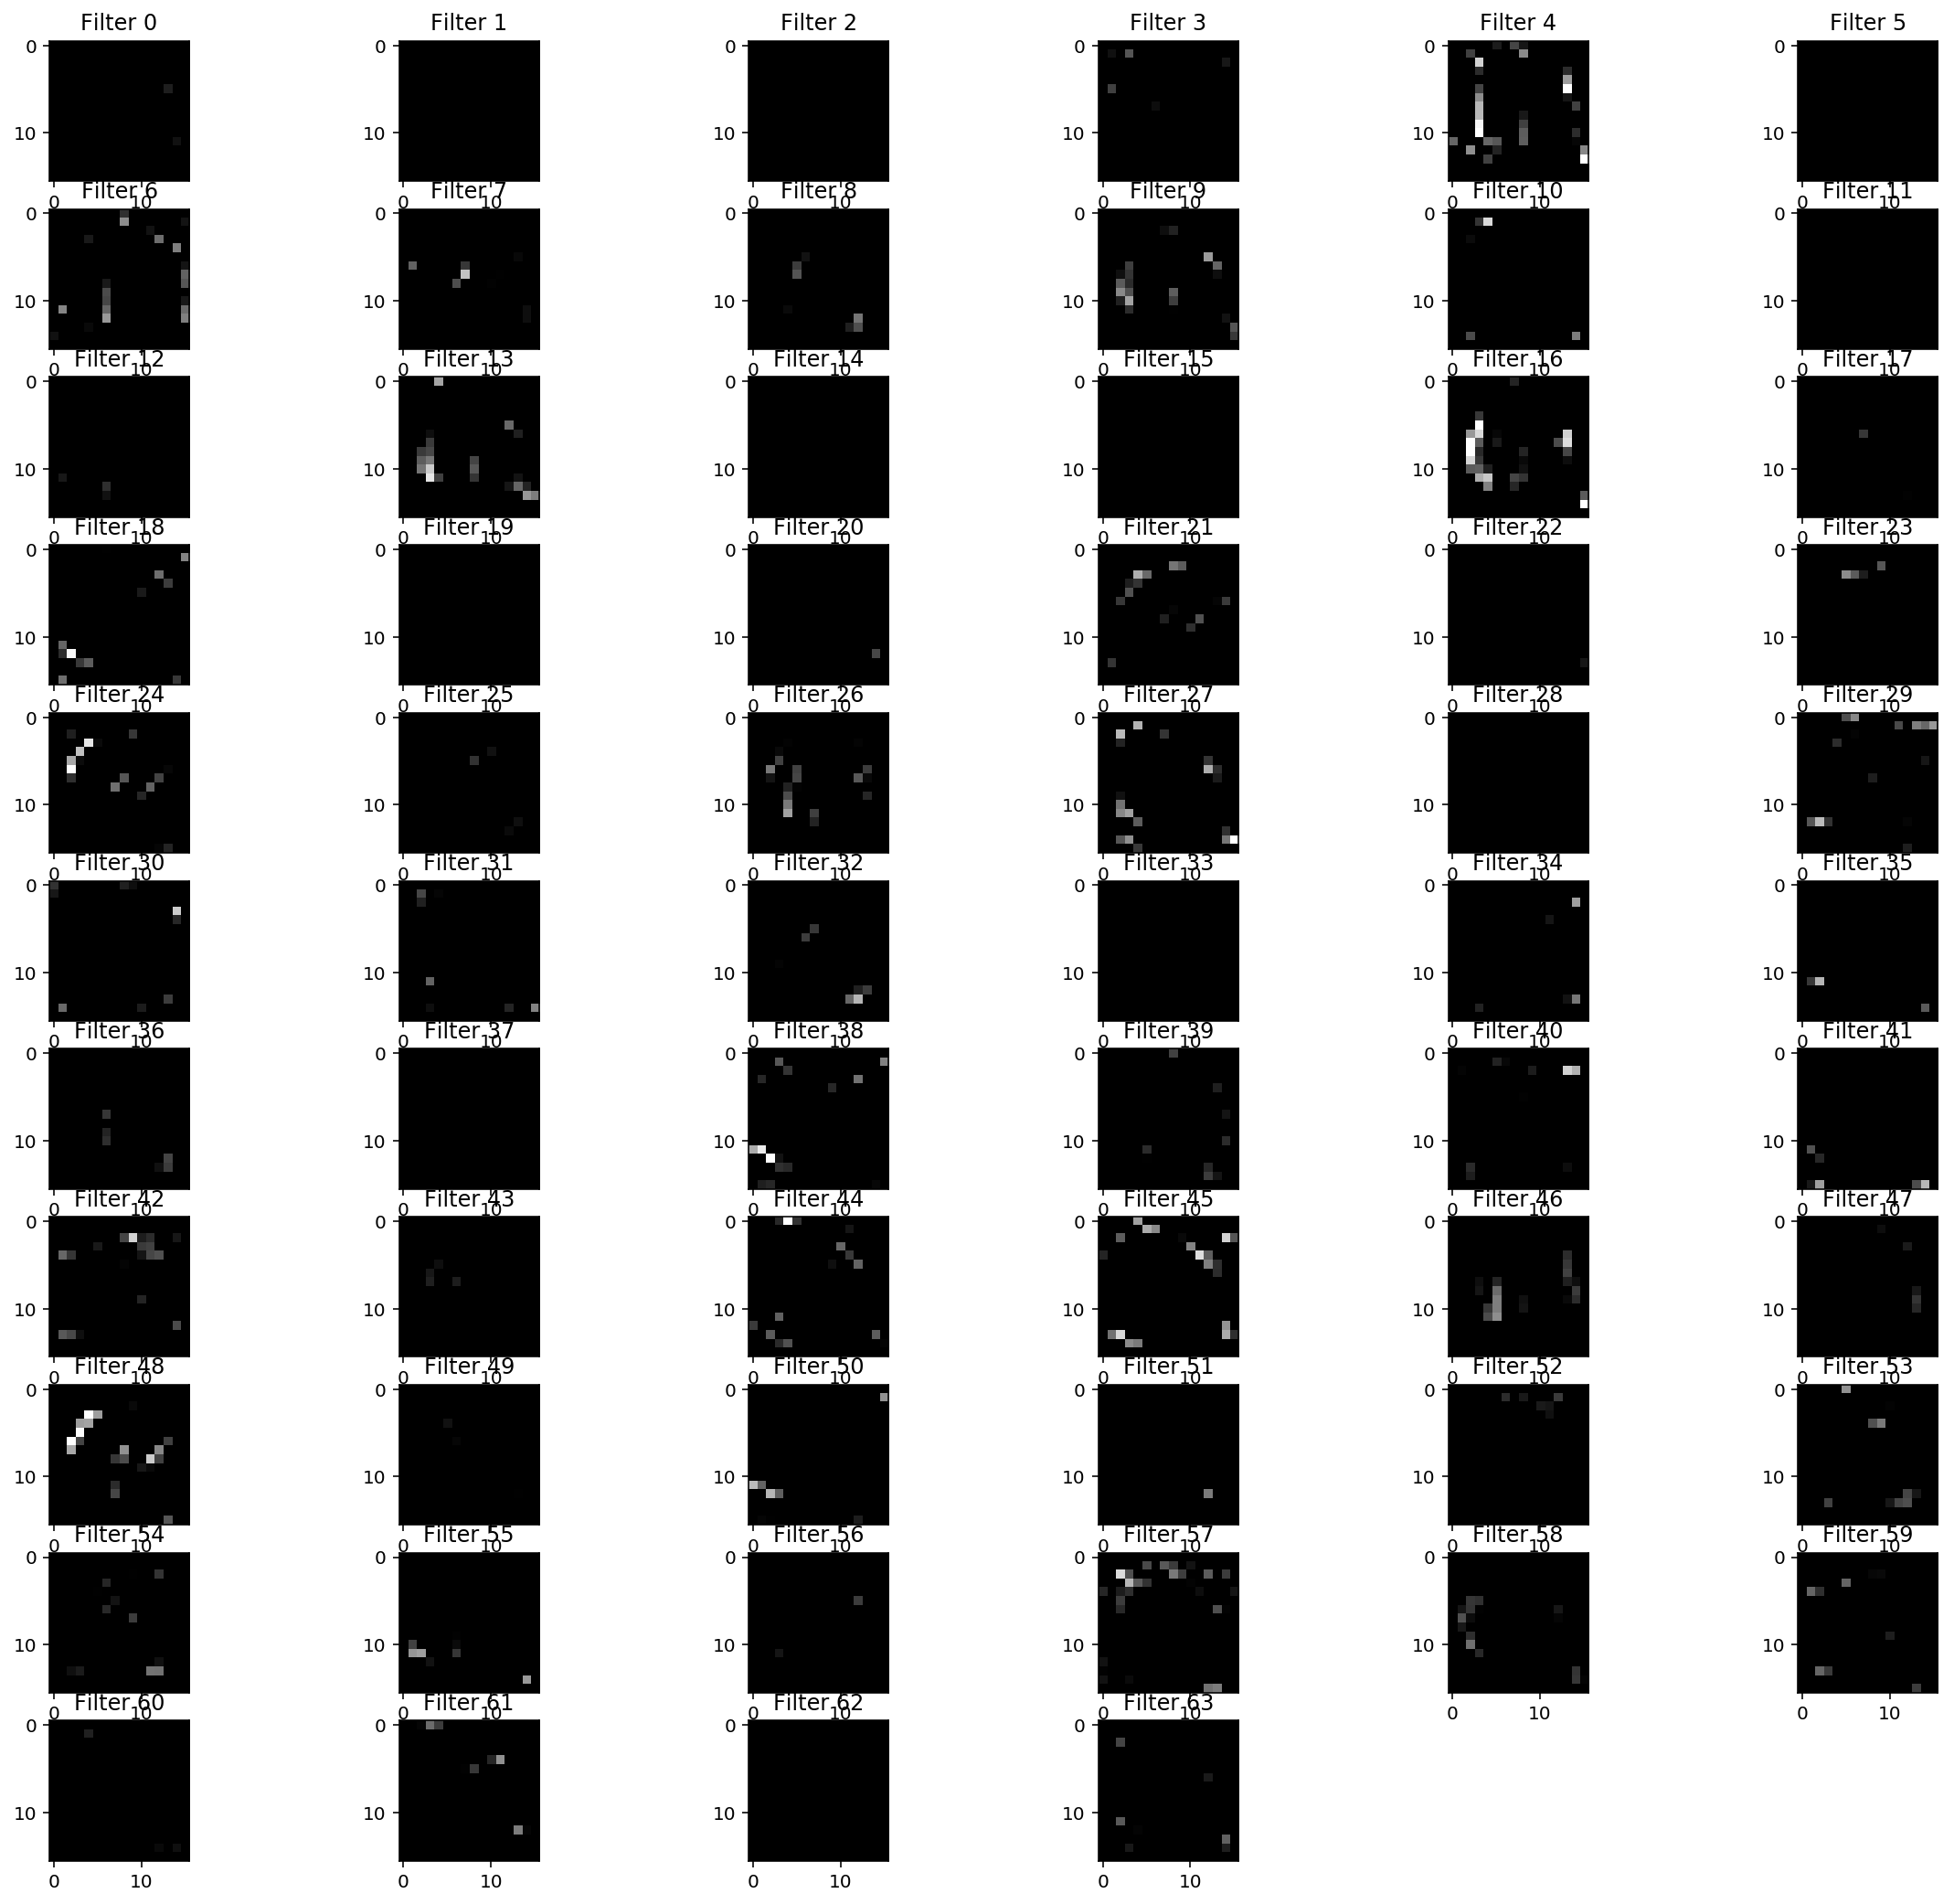

In [54]:
visualize_conv(imageToUse, 2, 'activation', 0.2, 0.5)

# Visualize Activations of Convolutional Layer 3

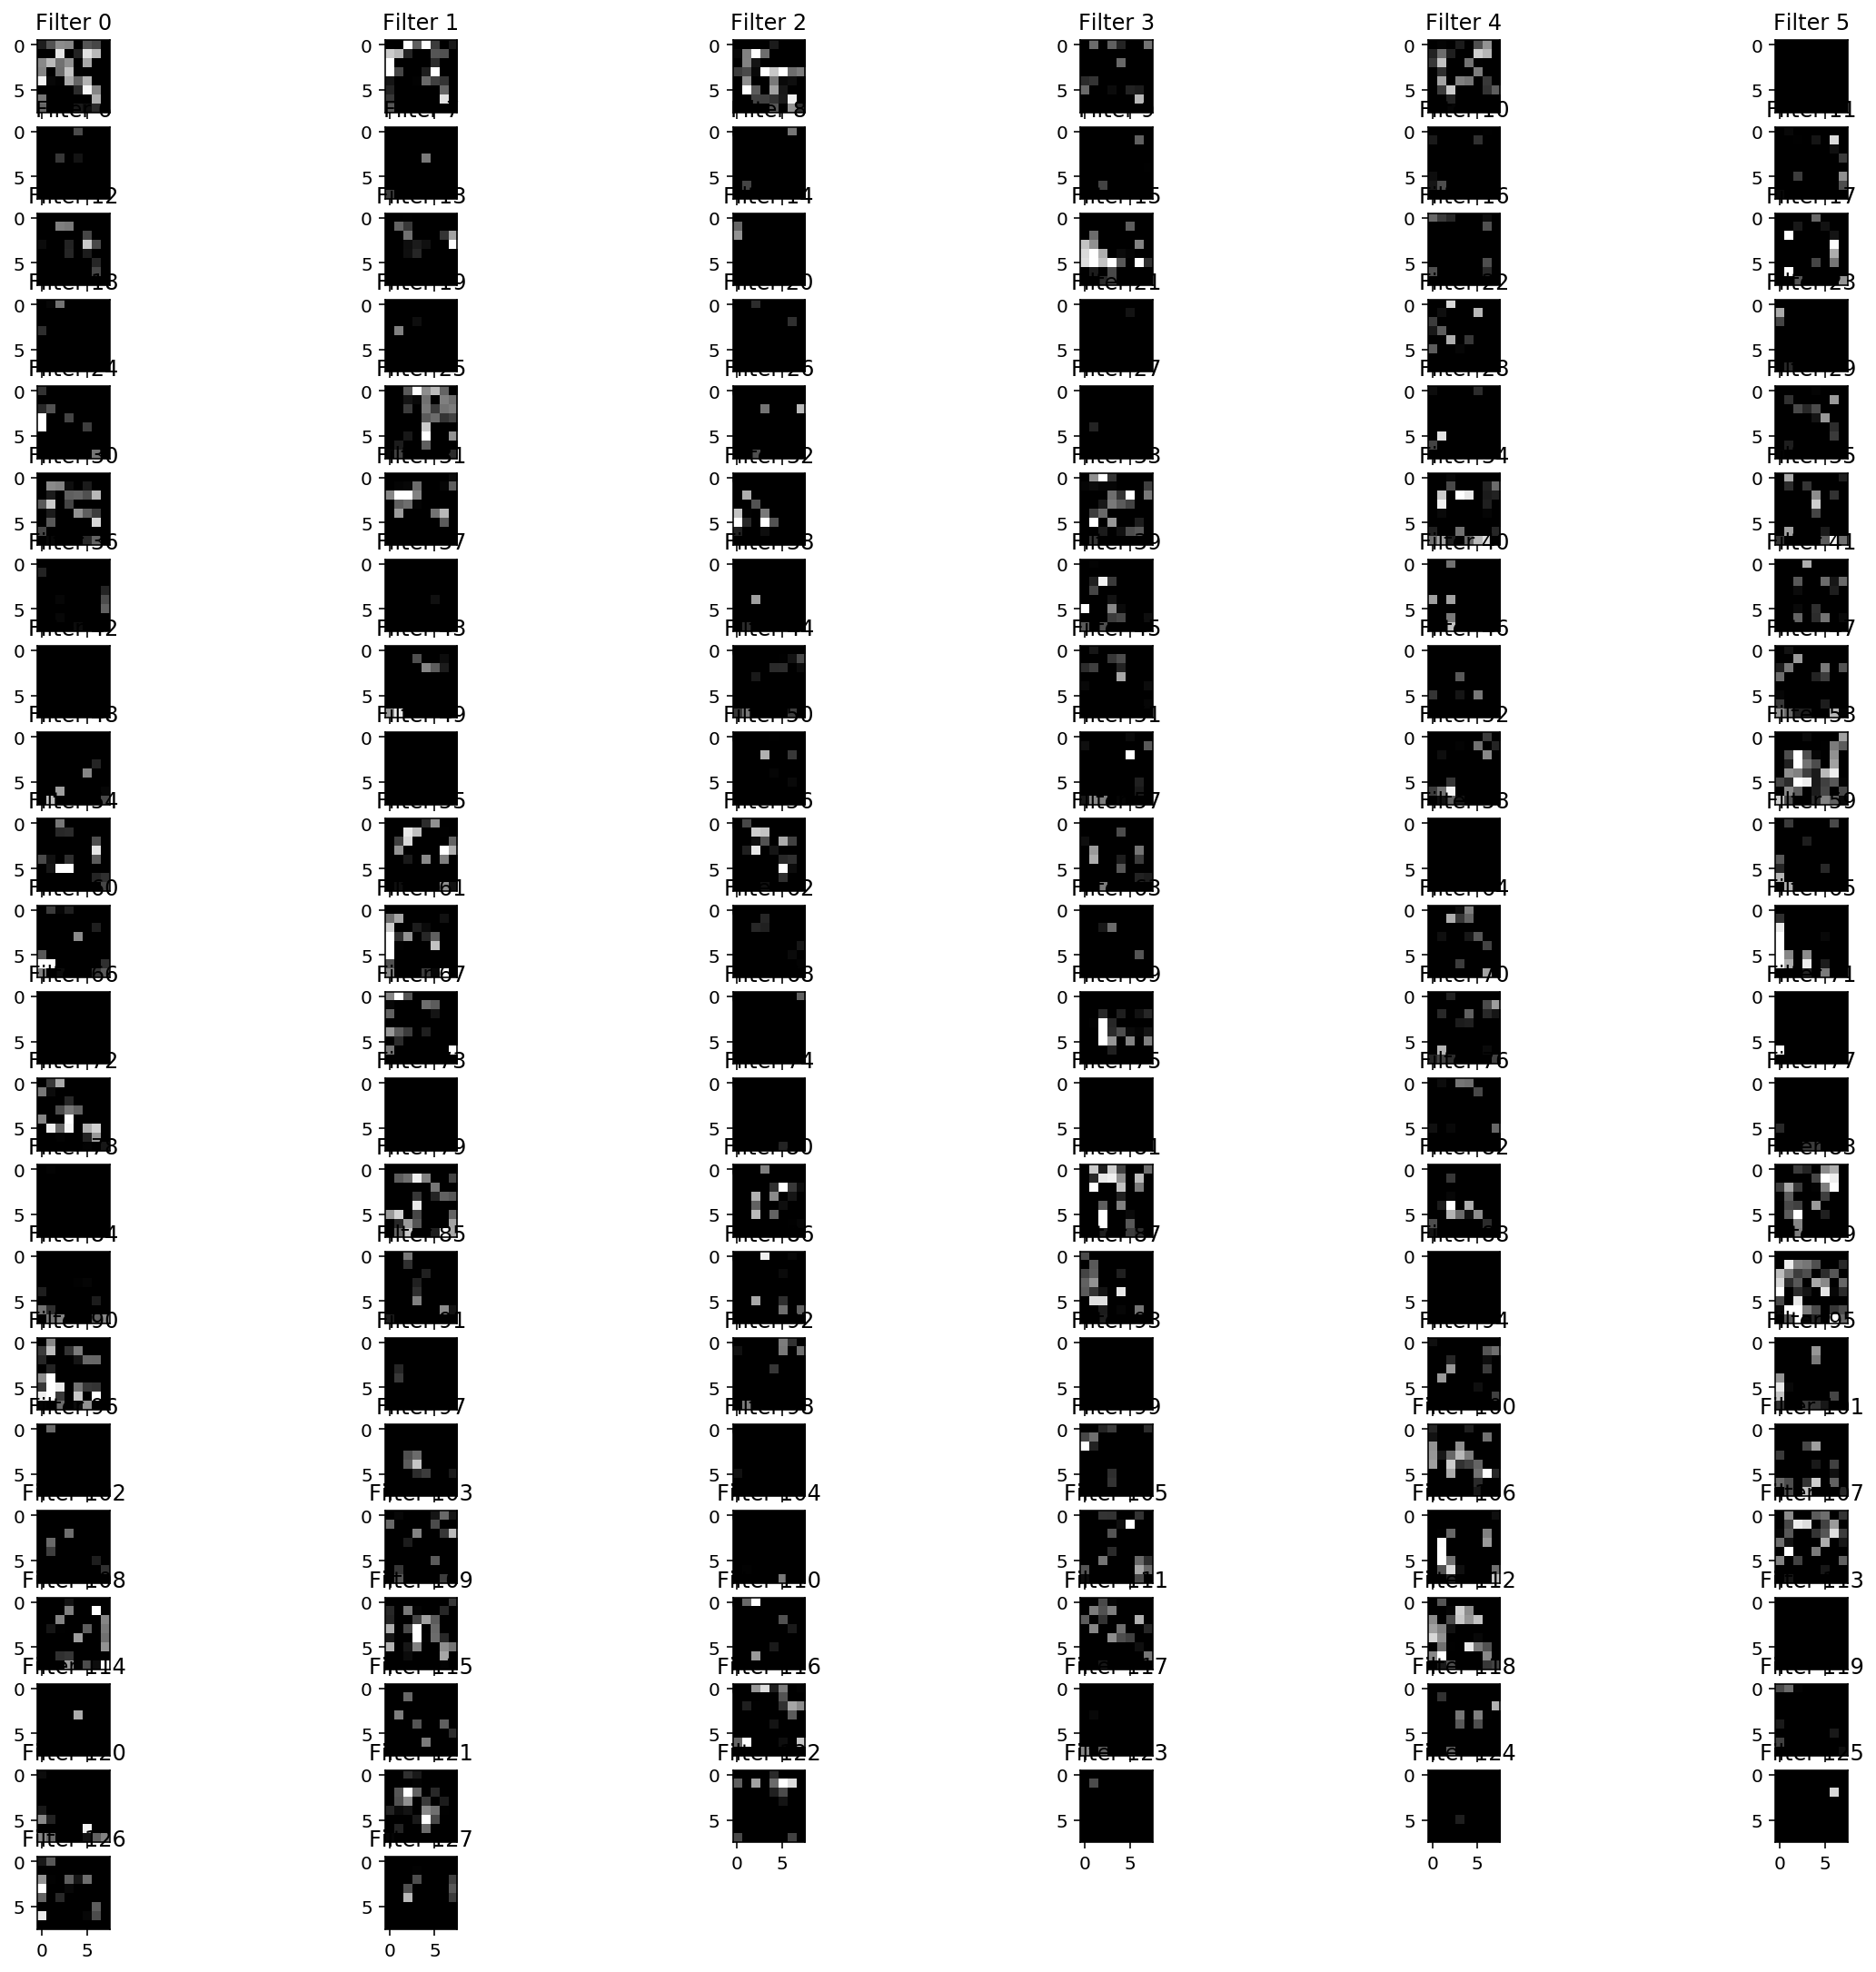

In [55]:
visualize_conv(imageToUse, 3, 'activation', 0.2, 0.5)

### Question

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**
The conv1 layer activation visualization shows that filters activate because of the shape of the sign (filter #9, #12, #14) and the arrow #4, #16, #23 and #26). There are filters which activate also on the background (#23, #26). That shows that the convnet learns on different aspects of the content and in later fully connected layers is able to compose these filter impressions into patterns that all images of a certain sign share. The more unique these pattern are, the more confident the network in its predictions.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 